In [1]:
import numpy as np
import os
import cv2
from keras.preprocessing.image import img_to_array,load_img
from keras.layers import Conv3D,ConvLSTM2D,Conv3DTranspose
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
store_image=[]
train_path='/content//drive//MyDrive//AvenueDataset//ALL'
train_videos=os.listdir(train_path)
train_images_path="//content//frames"

In [3]:
try:
    # creating a folder named data
    if not os.path.exists('frames'):
        os.makedirs('frames')

# if not created then raise error
except OSError:
    print ('Error: Creating directory of data')

In [4]:
#Here this function is used to store an image as an array.
#To conevert image to array,we can use a method imgtoarray() ,from keras library.
#In order to reduce computational power,we need to convert the image from RGB to grayscale.
#As different images might be of different sizes,we need to convert all images to the same size.For this we can use a function called resize() from cv2 library.
#to convert into GrayScale we can use standard NTSC formula or method called rgb_to_array() from keras library.
def store_inarray(image_path):
    image=load_img(image_path)
    image=img_to_array(image)
    image=cv2.resize(image, (227,227), interpolation = cv2.INTER_AREA)
    gray=0.2989*image[:,:,0]+0.5870*image[:,:,1]+0.1140*image[:,:,2]
    # gray = tf.image.rgb_to_grayscale(image)
    store_image.append(gray)

In [5]:
#in this function we will be converting a video to images and get them saved in a directory called Frames.
#To decode a video into frames we use a method VideoCapture from cv2 library.
#This method takes a the path of the video as parameter and returns an boolean value weather the path can be opeaned or not.
#The read() method of videocapture object reads an each frame from the video and returns an tuple with boolen value(weather there are any next frames) and curent Frame image.
#Here reading all the frames makes our dataset huge in size and requires more computational sources.So let us skip first 10 frames.set frames_skip values as 10.
#Once the usage of VideoCaputure() object is completed,we have to destroy it using relese() method.
def into_frames(train_path,video):
    cam=cv2.VideoCapture(train_path+'//'+video)
    i = 0
    j = 0
    frame_skip = 10
    print(cam.isOpened())
    while cam.isOpened():
        ret, frame = cam.read()
        # print(frame)
        if not ret:
            break
        if i > frame_skip - 1:
            # if video is still left continue creating images
            name = './frames/' + video + '_image_' + str(j) + '.jpg'
            print ('Creating...' + name)
            cv2.imwrite(name, frame)
            i = 0
            continue
        i += 1
        j += 1

    cam.release()

In [6]:
def mean_squared_loss(x1,x2):
    difference=x1-x2
    a,b,c,d,e=difference.shape
    n_samples=a*b*c*d*e
    sq_difference=difference**2
    Sum=sq_difference.sum()
    distance=np.sqrt(Sum)
    mean_distance=distance/n_samples
    return mean_distance

In [7]:
#creating Videos into Frames
for video in train_videos:
  # print(video)
  into_frames(train_path,video)

True
Creating..../frames/13 (1).avi_image_10.jpg
Creating..../frames/13 (1).avi_image_20.jpg
Creating..../frames/13 (1).avi_image_30.jpg
Creating..../frames/13 (1).avi_image_40.jpg
Creating..../frames/13 (1).avi_image_50.jpg
Creating..../frames/13 (1).avi_image_60.jpg
Creating..../frames/13 (1).avi_image_70.jpg
Creating..../frames/13 (1).avi_image_80.jpg
Creating..../frames/13 (1).avi_image_90.jpg
Creating..../frames/13 (1).avi_image_100.jpg
Creating..../frames/13 (1).avi_image_110.jpg
Creating..../frames/13 (1).avi_image_120.jpg
Creating..../frames/13 (1).avi_image_130.jpg
Creating..../frames/13 (1).avi_image_140.jpg
Creating..../frames/13 (1).avi_image_150.jpg
Creating..../frames/13 (1).avi_image_160.jpg
Creating..../frames/13 (1).avi_image_170.jpg
Creating..../frames/13 (1).avi_image_180.jpg
Creating..../frames/13 (1).avi_image_190.jpg
Creating..../frames/13 (1).avi_image_200.jpg
Creating..../frames/13 (1).avi_image_210.jpg
Creating..../frames/13 (1).avi_image_220.jpg
Creating..../f

In [8]:
images=os.listdir(train_images_path)
for image in images:
    image_path=train_images_path + '//' + image
    store_inarray(image_path)

In [9]:
len(images)

2771

In [10]:
store_image=np.array(store_image,dtype='uint8')                  # list containing images array is converted into array
a,b,c=store_image.shape

store_image.resize(b,c,a)
store_image=(store_image-store_image.mean())/(store_image.std()) # (x-mean)/standard_deviation (Data Standardization)
store_image=np.clip(store_image,0,1)
#print(store_image)
np.save('training.npy',store_image)

In [11]:
store_image.shape

(227, 227, 2771)

In [12]:
store_image

array([[[0.        , 0.        , 0.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 0.412271  ,
         0.412271  , 0.39618748],
        [0.36402043, 0.28360282, 0.23535225, ..., 0.33185339,
         0.38010396, 0.42835453],
        ...,
        [1.        , 1.        , 1.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.15493463, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.01018292,
         0.04234997, 0.05843349],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [13]:
#Bulding the model
model=Sequential()

model.add(Conv3D(filters=128,kernel_size=(11,11,1),strides=(4,4,1),padding='valid',input_shape=(227,227,10,1),activation='relu'))
model.add(Conv3D(filters=64,kernel_size=(5,5,1),strides=(2,2,1),padding='valid',activation='relu'))
model.add(ConvLSTM2D(filters=64,kernel_size=(3,3),strides=1,padding='same',dropout=0.4,recurrent_dropout=0.3,return_sequences=True))
model.add(ConvLSTM2D(filters=32,kernel_size=(3,3),strides=1,padding='same',dropout=0.3,return_sequences=True))
model.add(ConvLSTM2D(filters=64,kernel_size=(3,3),strides=1,return_sequences=True, padding='same',dropout=0.5))
model.add(Conv3DTranspose(filters=128,kernel_size=(5,5,1),strides=(2,2,1),padding='valid',activation='relu'))
model.add(Conv3DTranspose(filters=1,kernel_size=(11,11,1),strides=(4,4,1),padding='valid',activation='relu'))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [14]:
training_data=np.load('training.npy')
frames=training_data.shape[2]
frames=frames-frames%10

training_data=training_data[:,:,:frames]
training_data=training_data.reshape(-1,227,227,10)
training_data=np.expand_dims(training_data,axis=4)
target_data=training_data.copy()

epochs=10
batch_size=10

callback_save = ModelCheckpoint("saved_model.h5", monitor="mean_squared_error", save_best_only=True)

callback_early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history=model.fit(training_data,target_data, batch_size=batch_size, epochs=epochs, callbacks = [callback_save,callback_early_stopping])
model.save("saved_model.h5")

Epoch 1/10
28/28 [==============================] - ETA: 0s - loss: 0.2200 - accuracy: 0.5442

28/28 [==============================] - 42s 687ms/step - loss: 0.2200 - accuracy: 0.5442
Epoch 2/10
28/28 [==============================] - ETA: 0s - loss: 0.1978 - accuracy: 0.5497

28/28 [==============================] - 20s 735ms/step - loss: 0.1978 - accuracy: 0.5497
Epoch 3/10
28/28 [==============================] - ETA: 0s - loss: 0.1959 - accuracy: 0.5507

28/28 [==============================] - 18s 641ms/step - loss: 0.1959 - accuracy: 0.5507
Epoch 4/10
28/28 [==============================] - ETA: 0s - loss: 0.1269 - accuracy: 0.6592

28/28 [==============================] - 19s 668ms/step - loss: 0.1269 - accuracy: 0.6592
Epoch 5/10
28/28 [==============================] - ETA: 0s - loss: 0.0920 - accuracy: 0.7173

28/28 [==============================] - 20s 707ms/step - loss: 0.0920 - accuracy: 0.7173
Epoch 6/10
28/28 [==============================] - ETA: 0s - loss: 0.0840 - accuracy: 0.7255

28/28 [==============================] - 19s 664ms/step - loss: 0.0840 - accuracy: 0.7255
Epoch 7/10
28/28 [==============================] - ETA: 0s - loss: 0.0804 - accuracy: 0.7288

28/28 [==============================] - 20s 706ms/step - loss: 0.0804 - accuracy: 0.7288
Epoch 8/10
28/28 [==============================] - ETA: 0s - loss: 0.0787 - accuracy: 0.7304

28/28 [==============================] - 19s 655ms/step - loss: 0.0787 - accuracy: 0.7304
Epoch 9/10
28/28 [==============================] - ETA: 0s - loss: 0.0778 - accuracy: 0.7313

28/28 [==============================] - 19s 664ms/step - loss: 0.0778 - accuracy: 0.7313
Epoch 10/10
28/28 [==============================] - ETA: 0s - loss: 0.0771 - accuracy: 0.7319

28/28 [==============================] - 20s 737ms/step - loss: 0.0771 - accuracy: 0.7319


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
train_loss=history.history['loss']
train_acc=history.history['accuracy']

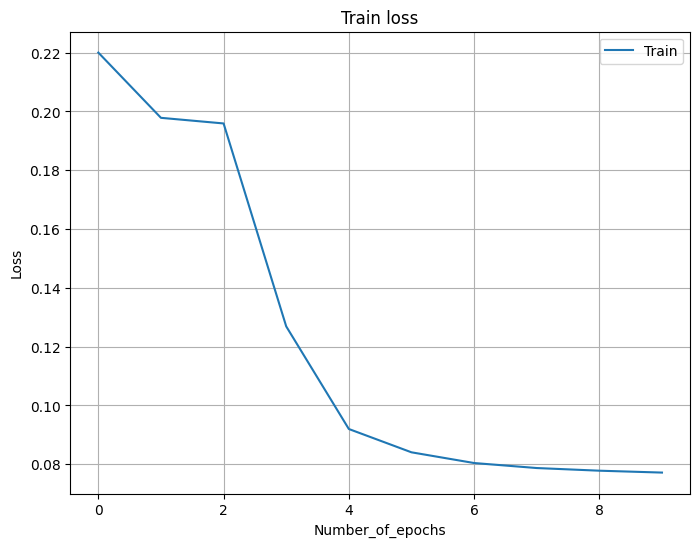

In [16]:
plt.figure(figsize=(8,6))
plt.plot(train_loss)
plt.xlabel('Number_of_epochs')
plt.ylabel('Loss')
plt.title('Train loss')
plt.legend(['Train'])
plt.grid('True')

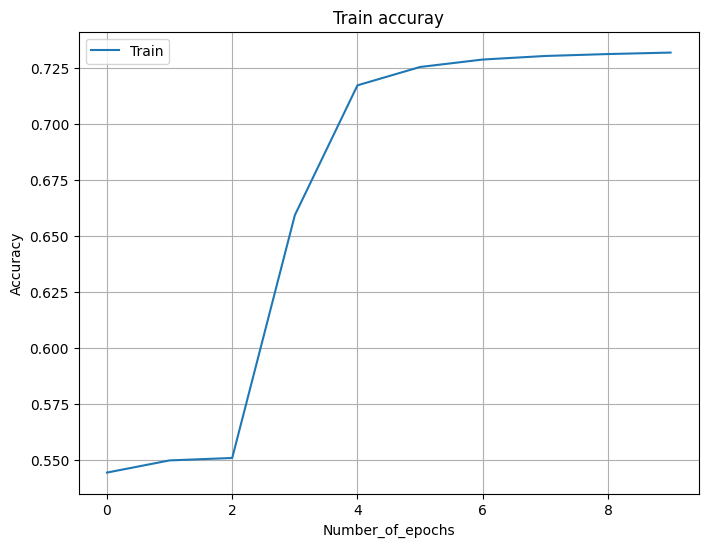

In [17]:
plt.figure(figsize=(8,6))
plt.plot(train_acc)
plt.xlabel('Number_of_epochs')
plt.ylabel('Accuracy')
plt.title('Train accuray')
plt.legend(['Train'])
plt.grid('True')